# **Setup**
 
Reset the Python environment to clear it of any previously loaded variables, functions, or libraries. Then, import the libraries needed to complete the code Professor Melnikov presented in the video.

In [1]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS
IS.ast_node_interactivity = "all"    # allows multiple outputs from a cell
import numpy as np, pandas as pd, matplotlib.pyplot as plt

<hr style="border-top: 2px solid #606366; background: transparent;">

# **Review**

## **The Sigmoid and Logit Functions**

<span style="color:black">The sigmoid function is a very useful function in machine learning that maps any real value to a value in the $[0,1]$ interval (i.e., a probability interval). This non-linear function is commonly applied on the model outputs, and the function's distribution represents some empirical (a.k.a. observed) distribution. The scaling of the sigmoid function produces well-behaving outputs, such as in [logistic regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html). The sigmoid function is particularly useful for modeling a binary response; in fact, you often use labels 0 and 1 for logistic regression because of their convenient interpretation.

<span style="color:black">The logit function is the inverse of the sigmoid function. Below are their definitions.


In [2]:
Sigmoid = lambda x: 1 / (1 + np.exp(-x))   # equivalently:  exp(x) / (1 + exp(x))
Logit = lambda p: np.log(p / (1 - p))      # Inverse sigmoid p is probability in [0,1]

## **Define a Vector of Real Values and Probabilities**

<span style="color:black">Define a vector of real values, $x$, and a vector of probabilities, $p$, that will be used to demostrate the output of the sigmoid and logit functions.

In [3]:
x = np.array([-5, 0 , 5])      # values needed to be mapped to probabilities
p = np.array([0.1, 0.5, 0.9])  # probabilities
print('x=', x)
print('p=', p)

x= [-5  0  5]
p= [0.1 0.5 0.9]


## **The Cancellation Effect**

<span style="color:black">The functions are applied element-wise, and the sigmoid of $x$ yields a vector of some probabilities while the logit of $p$ yields a vector of real values. Apply and compose the two functions to demonstrate their cancellation effect (since they are inverses of each other). Sigmoid(Logit(p)) returns p and Logit(Sigmoid(x)) returns x. 

In [4]:
print('Sigmoid(x)=', Sigmoid(x).round(2))
print('Logit(p)=', Logit(p).round(2))
print('Logit(Sigmoid(x))=', Logit(Sigmoid(x)).round(2))
print('Sigmoid(Logit(p))=', Sigmoid(Logit(p)).round(2))
print('Logit(0.5)=', Logit(0.5).round(2))

Sigmoid(x)= [0.01 0.5  0.99]
Logit(p)= [-2.2  0.   2.2]
Logit(Sigmoid(x))= [-5.  0.  5.]
Sigmoid(Logit(p))= [0.1 0.5 0.9]
Logit(0.5)= 0.0


## **Logistic and InverseLogistic**

<span style="color:black">Logistic is a generalized version of the Sigmoid where shift and scale parameters are used to slide and stretch the sigmoid. InverseLogistic is the inverse of Logistic function.

In [5]:
Logistic = lambda x, b0, b1: Sigmoid(b0 + b1 * x)
InverseLogistic = lambda p, b0, b1: (Logit(p) - b0) / b1

<span style="color:black">If you compose the two functions, the cancellation only takes place if the parameters are the same. You can try different parameters in one of the functions to observe that cancellation does not occur. In this case, these two functions with different parameters are not inverses of each other.

In [6]:
print('Logistic(x|β₀=1, β₁=2)=', Logistic(x, b0=1, b1=2).round(2))
print('InverseLogistic(Logistic(x|β₀=1, β₁=2)|β₀=1, β₁=2)=', InverseLogistic(Logistic(x, b0=1, b1=2), b0=1, b1=2).round(2))

Logistic(x|β₀=1, β₁=2)= [0.   0.73 1.  ]
InverseLogistic(Logistic(x|β₀=1, β₁=2)|β₀=1, β₁=2)= [-5.  0.  5.]


<span style="color:black">You can visualize the effect of the change in parameters of the Logistic function. Increases in the shift parameter, $\beta_0$, slide it to the left, while increases in the scale parameter, $\beta_1$, make the slope steeper. When this function is used in logistic regression, the model tries to shift and scale it so as to minimize the number of misclassifications on the training set.

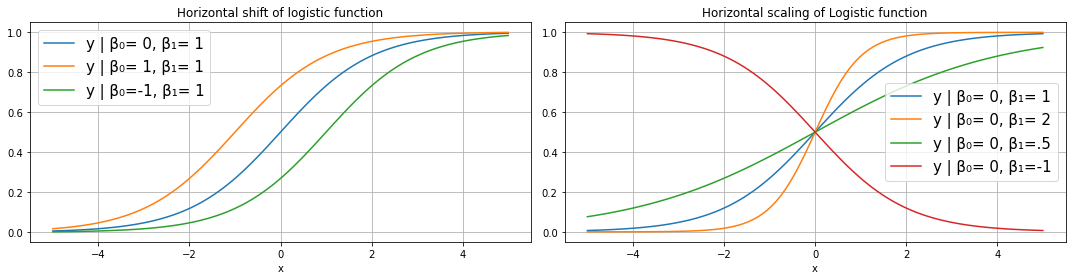

In [7]:
x = np.linspace(-5, 5, 100)
DXY0 = {'x':x, 'y | β₀= 0, β₁= 1':Logistic(x, b0= 0, b1= 1)}
DXY1 = {'x':x, 'y | β₀= 1, β₁= 1':Logistic(x, b0= 1, b1= 1)}
DXY2 = {'x':x, 'y | β₀=-1, β₁= 1':Logistic(x, b0=-1, b1= 1)}
DXY3 = {'x':x, 'y | β₀= 0, β₁= 2':Logistic(x, b0= 0, b1= 2)}
DXY4 = {'x':x, 'y | β₀= 0, β₁=.5':Logistic(x, b0= 0, b1=.5)}
DXY5 = {'x':x, 'y | β₀= 0, β₁=-1':Logistic(x, b0= 0, b1=-1)}

fig, ax = plt.subplots(1, 2, figsize=(15, 4));
plt.rcParams.update({'legend.fontsize': 15, 'legend.handlelength': 2})

pd.DataFrame(DXY0).set_index('x').plot(grid=True, ax=ax[0]);
pd.DataFrame(DXY1).set_index('x').plot(grid=True, ax=ax[0]);
pd.DataFrame(DXY2).set_index('x').plot(grid=True, ax=ax[0]);
ax[0].set_title('Horizontal shift of logistic function')

pd.DataFrame(DXY0).set_index('x').plot(grid=True, ax=ax[1]);
pd.DataFrame(DXY3).set_index('x').plot(grid=True, ax=ax[1]);
pd.DataFrame(DXY4).set_index('x').plot(grid=True, ax=ax[1]);
pd.DataFrame(DXY5).set_index('x').plot(grid=True, ax=ax[1]);
ax[1].set_title('Horizontal scaling of Logistic function')

plt.tight_layout();

<hr style="border-top: 2px solid #606366; background: transparent;">

# **Optional Practice**

Equipped with these concepts and tools, you will tackle a related task.

As you work through these tasks, check your answers by running your code in the *#check solution here* cell, to see if you’ve gotten the correct result. If you get stuck on a task, click the See **solution** drop-down to view the answer.

In [8]:
x = np.array([-5, 0])      # values needed to be mapped to probabilities
p = np.array([0.01, 0.3])  # some probabilities

## Task 1

Try some simple optimization of the parameters $\beta_0$ and $\beta_1$ using mean absolute error (MAE), 

$$\text{MAE}:=\frac{|x_0-p_0|+|x_1-p_1|}{2}$$

The Logistic function is defined by two parameters so it has two **degrees of freedom** (i.e., sources of uncertainty). Hence, two points are sufficient to compute these (initially, unknown) parameters (just like two points define a line). Now, given two points with coordinates $(x_i,p_i), i=1,2$ in real and probability spaces, find the Logistic function's parameters that yield the best fit of Logistic to these two points. A faster/better approach is to use an optimizer, such as [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html), but since the function is not too complicated (and because optimizers were not covered here), you can do a brute-force search of parameters.

<b>Hint:</b> Try values in between, say, $[-1,1]$ in small increments (say 1000 of them) for each parameter. Then pick the parameter pair, $\beta_0, \beta_1$, that yields the smallest absolute difference between the desired probability values. In other words, this is a double loop to evaluate Logistic function at x with 1 million parameter combinations and use the pair that gives the smallest difference from the given p.

This is a simple practical illustration of optimization procedure where the Logistic function is **fitted** to the given data points. Later you will use more advanced parameter-searching (or parameter optimizing) algorithms, which are already built into available machine learning libraries, such as Scikit-Learn (SKL).

In [9]:
# check solution here
# create a sequence of small increments for each parameter in the interval [-1,1]: 
B0, B1 = np.linspace(-1,1,1000), np.linspace(-1,1,1000)
# Compute the absolute difference between p0 and computed probability from x0 with the given parameters. 
# Also compute the absolute difference between p1 and computed probability from x1 with the given parameters.
# AbsErr returns the sum of these errors
AbsErr = lambda x, p, b0, b1: np.abs(Logistic(x[0],b0,b1)-p[0]) + np.abs(Logistic(x[1],b0,b1)-p[1])
# Compute absolute error for each combination of b0,b1, but report only the smallest error with the corresponding b0,b1:
min((AbsErr(x, p, b0,b1), (b0, b1)) for b0 in B0 for b1 in B1)  # returns the error and two best parameter values

(0.0001300938768071594, (-0.8478478478478478, 0.7497497497497498))

In [10]:
# create a sequence of small increments for each parameter in the interval [-1,1]: 
B0, B1 = np.linspace(-1,1,1000), np.linspace(-1,1,1000)
# Compute the absolute difference between p0 and computed probability from x0 with the given parameters. 
# Also compute the absolute difference between p1 and computed probability from x1 with the given parameters.
# AbsErr returns the sum of these errors
AbsErr = lambda x, p, b0, b1: (np.abs(Logistic(x[0],b0,b1)-p[0]) + np.abs(Logistic(x[1],b0,b1)-p[1]))/2
# Compute absolute error for each combination of b0,b1, but report only the smallest error with the corresponding b0,b1:
min((AbsErr(x, p, b0,b1), (b0, b1)) for b0 in B0 for b1 in B1)  # returns the error and two best parameter values

(6.50469384035797e-05, (-0.8478478478478478, 0.7497497497497498))

<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
<pre>
# create a sequence of small increments for each parameter in the interval [-1,1]: 
B0, B1 = np.linspace(-1,1,1000), np.linspace(-1,1,1000)
# Compute the absolute difference between p0 and computed probability from x0 with the given parameters. 
# Also compute the absolute difference between p1 and computed probability from x1 with the given parameters.
# AbsErr returns the sum of these errors
AbsErr = lambda x, p, b0, b1: np.abs(Logistic(x[0],b0,b1)-p[0]) + np.abs(Logistic(x[1],b0,b1)-p[1])
# Compute absolute error for each combination of b0,b1, but report only the smallest error with the corresponding b0,b1:
min((AbsErr(x, p, b0,b1), (b0, b1)) for b0 in B0 for b1 in B1)  # returns the error and two best parameter values
</pre>
</details> 
</font>
<hr>